In [56]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [134]:
invoice = pd.read_excel('data/Invoice and Opportunities.xlsx')
cpi = pd.read_excel('data/consumer_price_index.xlsx')
cpi = cpi.iloc[:,0:3]
cpi.head()

,Date,consumer_price_index,Inflation_rate
0,2019-01-01,103.01,NaN
1,2019-02-01,103.06,0.000485
2,2019-03-01,103.89,0.008054
3,2019-04-01,104.22,0.003176
4,2019-05-01,104.33,0.001055


In [108]:
invoice['Month'] = invoice['Date'].dt.to_period('M')
cpi['Month'] = cpi['Date'].dt.to_period('M')

# Group by the "Month" column and sum the "Amount"
monthly_invoice = invoice.groupby('Month').agg({"Amount": "sum"}).reset_index()
monthly_invoice.head()

merged_df = monthly_invoice.merge(cpi, on = "Month", how="outer")
merged_df.head()

,Month,Amount,Date,consumer_price_index,Inflation_rate,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,2020-01,350000.00,2020-01-01,104.54,-0.004191,NaN,NaN,NaN
1,2020-03,3000.00,2020-03-01,104.59,0.000574,NaN,NaN,NaN
2,2020-04,209.08,2020-04-01,104.56,-0.000287,NaN,NaN,NaN
3,2020-05,436988.09,2020-05-01,104.71,0.001435,NaN,NaN,NaN
4,2020-08,1478.40,2020-08-01,105.09,-0.000951,NaN,NaN,NaN


In [89]:
# x min max standarnization  x = x - xmin/ (xmax-xmin)
merged_df['Amount_standard'] = ( merged_df['Amount'] - merged_df['Amount'].min())/ (merged_df['Amount'].max() - merged_df['Amount'].min())
merged_df
merged_df['Inflation_rate_standard'] = ( merged_df['Inflation_rate '] - merged_df['Inflation_rate '].min())/ (merged_df['Inflation_rate '].max() - merged_df['Inflation_rate '].min())
merged_df.head()

,Month,Amount,Date,consumer_price_index,Inflation_rate,Amount_standard,Inflation_rate_standard
0,2020-01,350000.00,2020-01-01,104.54,-0.004191,0.100648,0.073138
1,2020-03,3000.00,2020-03-01,104.59,0.000574,0.000803,0.312928
2,2020-04,209.08,2020-04-01,104.56,-0.000287,0.000000,0.269610
3,2020-05,436988.09,2020-05-01,104.71,0.001435,0.125678,0.356232
4,2020-08,1478.40,2020-08-01,105.09,-0.000951,0.000365,0.236207


In [92]:
#Kolmogorov-Smirnov test

from scipy.stats import kstest

#perform Kolmogorov-Smirnov test
kstest(merged_df['Amount'], 'norm')

from scipy.stats import ks_2samp

#perform Kolmogorov-Smirnov test
ks_2samp(merged_df['Amount'], merged_df['Inflation_rate '])

# We have sufficient evidence to say that the two sample datasets do not come from the same distribution.

KstestResult(statistic=0.9482758620689655, pvalue=8.25438706933928e-29)

In [88]:
cross_table = pd.crosstab(merged_items['Inventory ID'], items['Tax Category'])

cross_table

Tax Category,0,TVA 20,TVA0,TVA10
Inventory ID,,,,
CAMP001,0,20,0,0
CAMP002,0,22,0,0
CAMP003,0,6,0,0
CAMP004,0,17,0,0
CAMP005,0,13,0,0
...,...,...,...,...
PARTPUB003,0,0,21,0
PARTPUB004,0,0,43,0
PARTPUB005,0,0,248,0


In [88]:
cross_table = pd.crosstab(merged_items['Inventory ID'], items['Tax Category'])

cross_table

Tax Category,0,TVA 20,TVA0,TVA10
Inventory ID,,,,
CAMP001,0,20,0,0
CAMP002,0,22,0,0
CAMP003,0,6,0,0
CAMP004,0,17,0,0
CAMP005,0,13,0,0
...,...,...,...,...
PARTPUB003,0,0,21,0
PARTPUB004,0,0,43,0
PARTPUB005,0,0,248,0


In [88]:
cross_table = pd.crosstab(merged_items['Inventory ID'], items['Tax Category'])

cross_table

Tax Category,0,TVA 20,TVA0,TVA10
Inventory ID,,,,
CAMP001,0,20,0,0
CAMP002,0,22,0,0
CAMP003,0,6,0,0
CAMP004,0,17,0,0
CAMP005,0,13,0,0
...,...,...,...,...
PARTPUB003,0,0,21,0
PARTPUB004,0,0,43,0
PARTPUB005,0,0,248,0


In [11]:
items = pd.read_excel('data/Items and Opportunities.xlsx')
non_stock_item = pd.read_excel('data/Non-Stock Items.xlsx')
non_stock_item .head()

merged_items = items.merge(non_stock_item, on = "Inventory ID", how="left")
merged_items

,Opportunity ID,Line Nbr.,Inventory ID,Year,Unit Price,Quantity,UOM,Ext. Price,Currency,Discount Amount,...,Free Item,Tax Category_x,Description EN,Posting Class,Tax Category_y,Base Unit,Item Status,Created On,Last Modified On,Default Price
0,6387,1.0,EVEN001,2023.0,9000.0,1.0,PIECE,9000.0,EUR,0.0,...,False,TVA0,Gala table Lyon,EVENT,TVA0,PIECE,Active,2021-02-12 02:59:04.063,2021-02-26 12:07:46.207,8000.0
1,6386,1.0,EVEN001,2023.0,9000.0,1.0,PIECE,9000.0,EUR,0.0,...,False,TVA0,Gala table Lyon,EVENT,TVA0,PIECE,Active,2021-02-12 02:59:04.063,2021-02-26 12:07:46.207,8000.0
2,6385,1.0,DONPAR,2023.0,140.0,1.0,PIECE,140.0,EUR,0.0,...,False,TVA0,Private donation,DONPAR,TVA0,PIECE,Active,2021-02-12 02:59:03.747,2021-02-26 12:07:45.793,0.0
3,6384,1.0,DONPAR,2023.0,350.0,1.0,PIECE,350.0,EUR,0.0,...,False,TVA0,Private donation,DONPAR,TVA0,PIECE,Active,2021-02-12 02:59:03.747,2021-02-26 12:07:45.793,0.0
4,6383,1.0,DONPAR,2023.0,120.0,1.0,PIECE,120.0,EUR,0.0,...,False,TVA0,Private donation,DONPAR,TVA0,PIECE,Active,2021-02-12 02:59:03.747,2021-02-26 12:07:45.793,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7453,5,2.0,MECENAT,2021.0,209.0,1.0,PIECE,209.0,EUR,0.0,...,False,TVA0,Sponsorship,MECENAT,TVA0,PIECE,Active,2021-02-12 02:59:03.890,2021-09-01 10:39:46.240,0.0
7454,4,1.0,MECENAT,2020.0,10625.0,1.0,PIECE,7500.0,EUR,0.0,...,False,0,Sponsorship,MECENAT,TVA0,PIECE,Active,2021-02-12 02:59:03.890,2021-09-01 10:39:46.240,0.0
7455,3,1.0,MECENAT,2020.0,35000.0,1.0,PIECE,35000.0,EUR,0.0,...,False,0,Sponsorship,MECENAT,TVA0,PIECE,Active,2021-02-12 02:59:03.890,2021-09-01 10:39:46.240,0.0
7456,2,1.0,MECENAT,2020.0,20000.0,1.0,PIECE,20000.0,EUR,0.0,...,False,0,Sponsorship,MECENAT,TVA0,PIECE,Active,2021-02-12 02:59:03.890,2021-09-01 10:39:46.240,0.0


In [18]:
grouped = merged_items.groupby('Inventory ID').size()

# Sort in descending order and select the top 20
top_20_descending = grouped.sort_values(ascending=False).head(20)

print(top_20_descending)



Inventory ID
MECENAT       1810
TAXEAPPR      1154
DONPAR         985
PARTPUB001     252
PARTPUB005     248
EVEN012        215
EVEN001        189
EVEN021        175
CAMP023        172
EVEN011        158
CAMP059        140
EVEN002        140
CAMP058        118
CAMP030        114
CAMP008         96
CAMP009         88
CAMP031         85
CAMP015         79
EVEN013         74
EVEN022         72
dtype: int64


In [51]:
grouped = items.groupby('Inventory ID').size()

# Sort in descending order and select the top 20
top_20_descending = grouped.sort_values(ascending=False).head(20)

top_20_descending.head()

#result = merged_items.groupby(['Inventory ID','Tax Category_x'])['Tax Category_x'].count()
#print(result)


Inventory ID
MECENAT       1810
TAXEAPPR      1154
DONPAR         985
PARTPUB001     252
PARTPUB005     248
dtype: int64

In [52]:
inventory_ext_price = merged_items.groupby('Inventory ID').agg({'Ext. Price': 'sum'}).reset_index()
Tax_Category_ext_price = merged_items.groupby('Tax Category_x').agg({'Ext. Price': 'sum'}).reset_index()
Tax_Category_ext_price

,Tax Category_x,Ext. Price
0,0,1.845323e+07
1,TVA 20,2.065413e+06
2,TVA0,1.134699e+08
3,TVA10,1.416204e+05


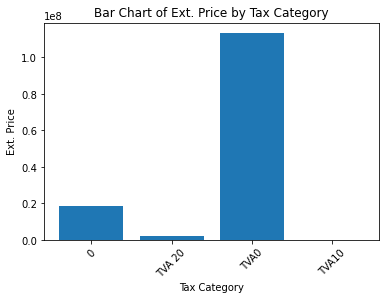

In [48]:
import matplotlib.pyplot as plt

plt.bar(Tax_Category_ext_price['Tax Category_x'], Tax_Category_ext_price['Ext. Price'])
plt.xlabel('Tax Category')
plt.ylabel('Ext. Price')
plt.title('Bar Chart of Ext. Price by Tax Category')
plt.xticks(rotation=45)
plt.show()


In [121]:
Opportunities = pd.read_excel('data/Opportunities.xlsx')
contacts = pd.read_excel('data/Contacts.xlsx')

merged_opportunity = pd.merge(Opportunities, contacts, right_on='ContactID', left_on='Contact ID', how='left')
selected_columns = merged_opportunity[["Class_y", "Contact ID"]].dropna()
selected_columns

#top20 = selected_columns.groupby('Class_y').size().sort_values(ascending=False).head(20)


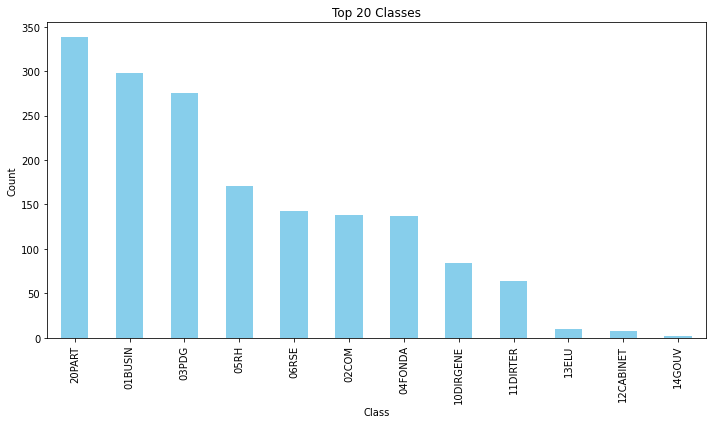

In [123]:
top20 = selected_columns.groupby('Class_y').size().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))  
top20.plot(kind='bar', color='skyblue')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Top 20 Classes')

plt.xticks(range(len(top20)), top20.index, rotation=90)

plt.tight_layout()
plt.show()


In [127]:

merged_opportunity.groupby('Class_y')['Estimated amount'].sum().sort_values(ascending=False)


Class_y
04FONDA      9779943.17
06RSE        5356390.01
03PDG        5150872.97
01BUSIN      4536251.73
02COM        3477366.90
10DIRGENE    3097018.44
11DIRTER     2571034.47
05RH         1490320.83
20PART        360606.20
13ELU         345000.00
12CABINET     189500.00
14GOUV          9000.00
Name: Estimated amount, dtype: float64

In [129]:
merged_opportunity.groupby('Class_y')['Difference'].sum().sort_values(ascending=True)


Class_y
04FONDA     -6217218.59
06RSE       -2619210.29
01BUSIN     -2226974.01
03PDG       -1981261.16
02COM       -1931871.96
11DIRTER    -1535009.00
10DIRGENE   -1507813.38
05RH         -503040.76
20PART       -263140.20
13ELU        -132500.00
12CABINET          0.00
14GOUV             0.00
Name: Difference, dtype: float64

In [131]:
merged_opportunity.groupby('Class_y')['Amount received'].sum().sort_values(ascending=False)

Class_y
04FONDA      3562724.58
03PDG        3169611.81
06RSE        2737179.72
01BUSIN      2309277.72
10DIRGENE    1589205.06
02COM        1545494.94
11DIRTER     1036025.47
05RH          987280.07
13ELU         212500.00
12CABINET     189500.00
20PART         97466.00
14GOUV          9000.00
Name: Amount received, dtype: float64

In [136]:
invoice.merge(Opportunities, on = "Opportunity ID")

,Type,Reference Nbr.,Customer,Amount,Date,Opportunity ID,Business Account,Contact ID,Estimated Close Date,Status,...,Theorical payment amount 3,Theorical payment date 4,Theorical payment amount 4,Theorical payment date 5,Theorical payment amount 5,Created On,Last Modified Date,Actual Close Date,Assignment Date,Branch ID
0,Invoice,FC0004608,C06507,5000.00,2023-10-10,4504,C06507,NaN,2023-10-10,New,...,NaN,NaT,NaN,NaT,NaN,2022-09-19 17:51:04.083,2023-10-11 12:18:44.520,NaT,2022-09-19 17:49:38.037,SDLV
1,Invoice,FC0004607,C01388,241253.00,2023-10-09,1863,C01388,NaN,2021-05-07,Open,...,NaN,NaT,NaN,NaT,NaN,2021-05-07 12:21:55.300,2023-10-11 10:10:22.427,NaT,2021-05-07 12:17:28.367,SDLV
2,Invoice,FC0001908,C01388,643340.00,2022-03-21,1863,C01388,NaN,2021-05-07,Open,...,NaN,NaT,NaN,NaT,NaN,2021-05-07 12:21:55.300,2023-10-11 10:10:22.427,NaT,2021-05-07 12:17:28.367,SDLV
3,Invoice,FC0001883,C01388,643340.00,2021-03-21,1863,C01388,NaN,2021-05-07,Open,...,NaN,NaT,NaN,NaT,NaN,2021-05-07 12:21:55.300,2023-10-11 10:10:22.427,NaT,2021-05-07 12:17:28.367,SDLV
4,Invoice,FC0004605,C19104,83954.00,2023-10-06,5708,C19104,46668.0,2023-10-06,Open,...,NaN,NaT,NaN,NaT,NaN,2023-05-30 10:04:36.403,2023-10-10 15:07:40.973,NaT,2023-05-30 10:02:13.600,SDLV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3233,Invoice,FC0000015,C00644,67.66,2021-03-01,1494,C00644,36245.0,2021-03-15,Won,...,NaN,NaT,NaN,NaT,NaN,2021-03-15 15:35:14.370,2021-05-18 14:49:46.367,2021-05-18,2021-03-15 15:34:46.703,SDLV
3234,Invoice,FC0000003,C00644,67.66,2021-03-15,1494,C00644,36245.0,2021-03-15,Won,...,NaN,NaT,NaN,NaT,NaN,2021-03-15 15:35:14.370,2021-05-18 14:49:46.367,2021-05-18,2021-03-15 15:34:46.703,SDLV
3235,Invoice,FC0000014,C00621,200000.00,2021-03-02,76,C00621,NaN,2020-01-01,Won,...,NaN,NaT,NaN,NaT,NaN,2021-02-12 06:10:42.740,2022-01-25 08:40:10.420,2022-01-25,2021-02-22 18:00:36.133,SDLV
3236,Invoice,FC0000010,C00621,350000.00,2020-01-01,76,C00621,NaN,2020-01-01,Won,...,NaN,NaT,NaN,NaT,NaN,2021-02-12 06:10:42.740,2022-01-25 08:40:10.420,2022-01-25,2021-02-22 18:00:36.133,SDLV


In [88]:
cross_table = pd.crosstab(merged_items['Inventory ID'], items['Tax Category'])

cross_table

Tax Category,0,TVA 20,TVA0,TVA10
Inventory ID,,,,
CAMP001,0,20,0,0
CAMP002,0,22,0,0
CAMP003,0,6,0,0
CAMP004,0,17,0,0
CAMP005,0,13,0,0
...,...,...,...,...
PARTPUB003,0,0,21,0
PARTPUB004,0,0,43,0
PARTPUB005,0,0,248,0


,Type,Reference Nbr.,Customer,Amount,Date,Opportunity ID
0,Invoice,FC0004608,C06507,5000.00,2023-10-10,4504
1,Invoice,FC0004607,C01388,241253.00,2023-10-09,1863
2,Invoice,FC0004605,C19104,83954.00,2023-10-06,5708
3,Invoice,FC0004600,C10528,3000.00,2023-06-23,5617
4,Invoice,FC0004598,C01196,54531.00,2023-10-09,5829
...,...,...,...,...,...,...
3233,Invoice,FC0000008,C00087,5000.00,2021-03-11,1410
3234,Invoice,FC0000007,C00589,3000.00,2020-03-29,1056
3235,Invoice,FC0000005,C00644,4504.95,2021-03-15,1499
3236,Invoice,FC0000004,C00644,455.37,2021-03-15,1495


In [133]:
import seaborn as sns

sns.set()
time_data = 
plt.plot(btc.index, btc['BTC-USD'], )

In [71]:
import pandas as pd


